# Проект: Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-датасета" data-toc-modified-id="Загрузка-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка датасета</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

**Описание проекта**

У страховой компании «Хоть потоп» (название вымышленное) появилась потребность в защите персональных данных своих клиентов. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. А так-же обосновать корректность работы этого метода.

Нужно защитить данные таким образом, чтобы после их преобразовании качество моделей машинного обучения не ухудшилось.

**Описание данных**

Файл с данными: `insurance.csv`
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

### Импорт библиотек

Импортируем необходимые библиотки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Загрузка датасета

Загрузим датасет и посмотрим на него:

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
print('Data:')
display(df)
print('---------------------------------------------------')
print('Info:')
print(df.info())
print('---------------------------------------------------')
print('Shape:', df.shape)
print('---------------------------------------------------')
print('Correlation:')
display(df.corr())
print('---------------------------------------------------')
print('Sample:')
display(df.sample(10, random_state=555))

Data:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


---------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
---------------------------------------------------
Shape: (5000, 5)
---------------------------------------------------
Correlation:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


---------------------------------------------------
Sample:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4434,1,39.0,37800.0,2,0
3169,0,36.0,24800.0,0,0
735,0,18.0,54800.0,1,0
3720,1,39.0,40900.0,1,0
3974,1,35.0,48200.0,1,0
4894,1,33.0,58400.0,0,0
2702,0,25.0,35700.0,0,0
4317,1,29.0,29100.0,1,0
838,1,26.0,27900.0,0,0
1010,0,36.0,28000.0,1,0


На первый взгляд видно:
- Пропусков в данных нет;
- Присутствует небольшая корреляция между возрастом и страховыми выплатами;
- Возможно есть аномальные значения в колонках возраста, зарплаты, пола и членов семьи;
- Возможен сильный дисбаланс в колонке с целевым признаком.
- Колонки написаны на русском и с большой буквы.

### Предобработка данных

Для удобства дальнейшей работы, переделаем названия колонок:

In [3]:
df.columns = ['gender', 'age', 'salary', 'family members', 'insurance payments']
df.head()

,gender,age,salary,family members,insurance payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Теперь посмотрим на выбросы. Сначала в колонке пол:

In [4]:
df['gender'].value_counts()

0    2505
1    2495
Name: gender, dtype: int64

Тут всё в порядке. Далее посмотрим на возраст:

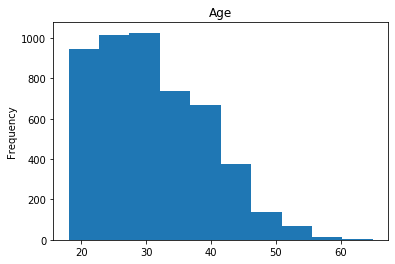

In [5]:
df['age'].plot(kind='hist', title='Age')

Тут тоже выглядит всё вполне нормально. Теперь колонка с зарплатой:

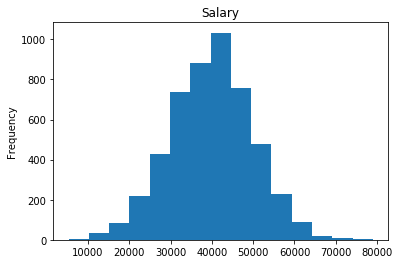

In [6]:
df['salary'].plot(kind='hist', bins=15, title='Salary')

Хорошее нормальное распределение. Ещё посмотрим на членов семьи:

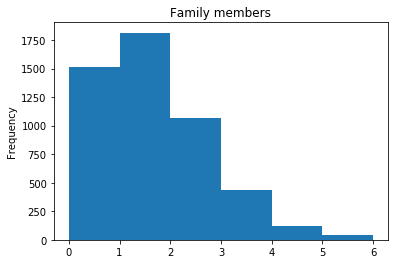

In [7]:
df['family members'].plot(kind='hist', bins=6, title='Family members')

Тоже аномалий не наблюдается. И наконец посмотрим на целевые признаки:

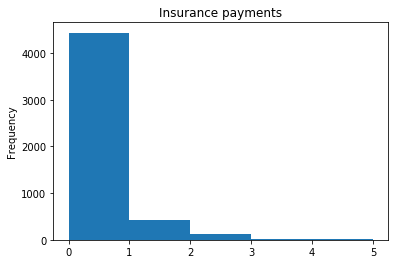

In [8]:
df['insurance payments'].plot(kind='hist', bins=5, title='Insurance payments')

Видно, что выплат намного меньше, есть даже маленький процент тех у кого по 4 и 5 выплат.

В целом, данные выглядят хорошо. Пропусков нет, аномалий тоже. Присутствует дисбаланс целевых признаков, это связано со спецификой в области страхования. Будем держать это в голове, возможно на стадии обучения модели, придётся что-то с этим делать.

Можно двигаться дальше.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Ответим на вопрос: Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу?

Я считаю, что качество не должно измениться.


**Обоснование:**

Отталкиваемся от формулы обучения:

$$
w = Inv(X.T * X) * X.T * y
$$

$Inv(X.T) * X.T$ получаем единичную матрицу $E$

Получаем: $w = Inv(X) * y$

Далее нужно умножить X на обратимую матрицу P:

$$
w' = Inv(XP.T * XP) * XP.T * y
$$

$Inv(XP.T) * XP.T$ получаем единичную матрицу $E$

Получаем: $w' = Inv(P) * Inv(X) * y$

В итоге: $w' = Inv(P) * w$

И потом подставляем в формулу для прогноза $a = Xw$ новые $XP$ и $w'$.

$$
a' = XPw' = XP * w' = X * P * Inv(P) * w
$$

$Inv(P) * P$ получаем единичную матрицу $E$

Значит: $a' = X * w = a$

Получится в итоге: $a' = a$. То есть предсказания будут равны целевым признакам. А значит качество предсказаний не изменится.

## Алгоритм преобразования

**Алгоритм**

Итак, у нас есть данные пользовалелей = матрица признаков $X$.

Шифруем данные путём умножения матрицы признаков $X$ на обратимую матрицу $P$. Получаем зашифрованную матрицу $XP$.

Обучаем модель линейной регрессии на обычных данных: $w = Inv(X) * y$\
Делаем предсказания на обычных данных: $a = Xw$

Обучаем модель на зашифрованных данных: $wP = Inv(P) * w$\
Делаем предсказания на зашифрованных данных: $a' = X'wP$

Сравниваем предсказания.

**Обоснование**

Если всё правильно, то при преобразовании матрицы путём умножения её на обратимую матрицу, мы можем получить одинаковые результаты на обоих выборках с небольшой погрешностью.

## Проверка алгоритма

Займёмся практической частью нашего эксперимента в шифрованием.

Сперва разделим данные на выборки:

In [9]:
df_features = df.drop(['insurance payments'], axis=1)
df_target = df['insurance payments']

features_train, features_test, target_train, target_test = train_test_split(
    df_features, df_target, test_size=.25, random_state=555)
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape, sep=' | ')

(3750, 4) | (3750,) | (1250, 4) | (1250,)


In [10]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
score = r2_score(target_test, predictions)
score

0.43677356066799145

Теперь преобразуем матрицу, разделим на выборки и посмотрим на результаты:

In [11]:
while True:
    matrix = np.random.normal(size=(df_features.shape[1],df_features.shape[1]))
    try:
        inv_matrix = np.linalg.inv(matrix)
        break
    except:
        continue
        
df_features_transform = df_features @ inv_matrix
df_features_transform.columns = df_features.columns
df_features_transform.head()

,gender,age,salary,family members
0,-10380.561592,37126.645918,12217.419131,15383.367788
1,-7967.007606,28447.936416,9366.645648,11782.560572
2,-4406.496084,15721.259223,5177.834108,6510.809077
3,-8714.726044,31213.173497,10267.339922,12935.201101
4,-5468.220718,19536.413762,6430.788669,8093.949191


Получили зашифрованную таблицу с признаками.

Теперь на получившихся данных произведём разделение, обучение, предсказания и оценку.

In [12]:
features_train_transform, features_test_transform, target_train, target_test = train_test_split(
    df_features_transform, df_target, test_size=.25, random_state=555)
print(
    features_train_transform.shape, target_train.shape,
    features_test_transform.shape, target_test.shape, sep=' | ')

(3750, 4) | (3750,) | (1250, 4) | (1250,)


In [13]:
model.fit(features_train_transform, target_train)
predictions_transform = model.predict(features_test_transform)
score_transform = r2_score(target_test, predictions_transform)
print('R2-score before transform data:', score)
print('R2-score after transform data: ', score_transform)

R2-score before transform data: 0.43677356066799145
R2-score after transform data:  0.4367735606682752


## Вывод

Получилось, что после преобразования признаков, предсказания модели не изменились. Значит шифрование путём умножения на обратимую матрицу работает.